# Tutorial on the dataset and basic functions

### Importing the libraries

In [1]:
import json
import sys
import pandas as pd
import collections 
import os
import numpy as np
from itertools import chain
from itertools import combinations
sys.path.insert(0, '..')
from src.experiment_utils.helper_classes import token, span, repository
from src.d02_corpus_statistics.corpus import Corpus
from definitions import ROOT_DIR
from pyannote.core import Segment

## Classes and data frame

### Data frame

All the information is now stored in a dataframe called "stat_df" containing the string of the directory path, the raw text, and all the annotations (in form of list of spans) starting with the curation followed by all annotators:

In [2]:
dataframe_dir = os.path.join(ROOT_DIR,'data/02_processed_to_dataframe', 'preprocessed_dataframe.pkl')
stat_df = pd.read_pickle(dataframe_dir)
stat_df.head()

,Policy,Text,Tokens,Article_State,Finished_Annotators,Curation,A,C,F,B,E,G,D
EU_32018R1999_Title_0_Chapter_7_Section_3_Article_43,,article 43\r\nexercise of the delegation\r\n1....,"[token id: T1, start:0 stop:7 text:article tag...",CURATION_FINISHED,"[A, C]",[span id:CUR0 annotator:Curation layer:Instrum...,[span id:A1 annotator:A layer:Instrumenttypes ...,[span id:C1 annotator:C layer:Policydesignchar...,,,,,
EU_32019R0631_Title_0_Chapter_0_Section_0_Article_12,,article 12\r\nreal-world co2 emissions and fue...,"[token id: T459, start:0 stop:7 text:article t...",CURATION_FINISHED,"[F, B]",[span id:CUR36 annotator:Curation layer:Instru...,,,[span id:F1 annotator:F layer:Instrumenttypes ...,[span id:B1 annotator:B layer:Policydesignchar...,,,
EU_32018L2001_Title_0_Chapter_0_Section_0_Article_11,,article 11\r\njoint projects between member st...,"[token id: T974, start:0 stop:7 text:article t...",CURATION_FINISHED,"[C, F]",[span id:CUR116 annotator:Curation layer:Instr...,,[span id:C28 annotator:C layer:Instrumenttypes...,[span id:F58 annotator:F layer:Instrumenttypes...,,,,
EU_32018R1999_Title_0_Chapter_7_Section_3_Article_56,,article 56\r\namendments to directive (eu) 201...,"[token id: T2008, start:0 stop:7 text:article ...",CURATION_FINISHED,"[A, C]",[span id:CUR202 annotator:Curation layer:Polic...,[span id:A38 annotator:A layer:Policydesigncha...,[span id:C129 annotator:C layer:Policydesignch...,,,,,
EU_32018L2001_Title_0_Chapter_0_Section_0_Article_03,,article 3\r\nbinding overall union target for ...,"[token id: T2220, start:0 stop:7 text:article ...",CURATION_FINISHED,"[C, F, B]",[span id:CUR211 annotator:Curation layer:Instr...,,[span id:C138 annotator:C layer:Instrumenttype...,[span id:F165 annotator:F layer:Instrumenttype...,[span id:B27 annotator:B layer:Instrumenttypes...,,,


In [3]:
stat_df.shape

(448, 13)

The annotated spans in each article are stored in list and can be accessed as follows:

In [4]:
stat_df['Curation'][0]

[span id:CUR0 annotator:Curation layer:Instrumenttypes feature:InstrumentType tag:Unspecified start:64 stop:78 text:delegated acts,
 span id:CUR1 annotator:Curation layer:Instrumenttypes feature:InstrumentType tag:Unspecified start:188 stop:202 text:delegated acts,
 span id:CUR2 annotator:Curation layer:Instrumenttypes feature:InstrumentType tag:Unspecified start:1227 stop:1241 text:delegated acts,
 span id:CUR3 annotator:Curation layer:Instrumenttypes feature:InstrumentType tag:Unspecified start:1284 stop:1297 text:delegated act,
 span id:CUR4 annotator:Curation layer:Instrumenttypes feature:InstrumentType tag:Unspecified start:1516 stop:1529 text:delegated act,
 span id:CUR5 annotator:Curation layer:Instrumenttypes feature:InstrumentType tag:Unspecified start:1632 stop:1645 text:delegated act,
 span id:CUR6 annotator:Curation layer:Policydesigncharacteristics feature:Actor tag:Authority_legislative start:99 stop:109 text:commission,
 span id:CUR7 annotator:Curation layer:Policydesign

#### Accessing an annotated span
Each annotated span has a layer, feature, tag, start, stop, and the annotatet text (raw). See for example:

In [5]:
stat_df['Curation'][2][2]

span id:CUR118 annotator:Curation layer:Instrumenttypes feature:InstrumentType tag:Unspecified start:5044 stop:5059 text:joint agreement

Each annotated span further has a repository, list of all the tokens, and an annotator. 
The repository looks like this:

In [6]:
stat_df['Curation'][2][2].rep

policy:EU_32018L2001 title:Title_0 chapter:Chapter_0 section:Section_0 article:Article_11

Overlapping annotations are indicated by tag_count>1:

In [7]:
stat_df['Curation'][2][2].tokens

[token id: T1922, start:5044 stop:5049 text:joint tag_count:1,
 token id: T1923, start:5050 stop:5059 text:agreement tag_count:1]

In [8]:
stat_df['Curation'][2][2].annotator

'Curation'

#### Tokens
It is important to note that the token objects reside in the separate column 'Tokens', the list of tokens for each span is just a pointer to those objects residing in the token column.

Each token has a start, stop, text and a tag_count. The tag_count counts how many times this specific token has been labeled.

In [9]:
stat_df['Tokens'][2][48]

token id: T1022, start:265 stop:268 text:may tag_count:0

In [10]:
stat_df['Tokens'][2][:]

[token id: T974, start:0 stop:7 text:article tag_count:0,
 token id: T975, start:8 stop:10 text:11 tag_count:0,
 token id: T976, start:12 stop:17 text:joint tag_count:0,
 token id: T977, start:18 stop:26 text:projects tag_count:0,
 token id: T978, start:27 stop:34 text:between tag_count:0,
 token id: T979, start:35 stop:41 text:member tag_count:1,
 token id: T980, start:41 stop:42 text:  tag_count:1,
 token id: T981, start:42 stop:48 text:states tag_count:1,
 token id: T982, start:49 stop:52 text:and tag_count:0,
 token id: T983, start:53 stop:58 text:third tag_count:0,
 token id: T984, start:59 stop:68 text:countries tag_count:0,
 token id: T985, start:70 stop:71 text:1 tag_count:0,
 token id: T986, start:71 stop:72 text:. tag_count:0,
 token id: T987, start:72 stop:75 text:    tag_count:0,
 token id: T988, start:75 stop:78 text:one tag_count:0,
 token id: T989, start:79 stop:81 text:or tag_count:0,
 token id: T990, start:82 stop:86 text:more tag_count:0,
 token id: T991, start:87 sto

### Conditional Repository
Repositories can be created trought the normal constructor **init**(self, policy, title, chapter, section, article), or trough the classmethod **from_repository_name**(cls, rep_str), taking a longer string of the repository name. 

The repository class can be used to create conditional repositories, which are helpful when working with all articles that match a certain condition. Let's create a test repository from a repository name:

In [11]:
test_dir = repository.from_repository_name("EU_32008R1099_Title_0_Chapter_0_Section_0_Article_03")
test_dir

policy:EU_32008R1099 title:Title_0 chapter:Chapter_0 section:Section_0 article:Article_03

Let's now create a conditional repository. On each level, we can match a certain condition by entering the respective name. We can also match all names by inserting 'None', where we match all repositorys with the attributes given other than 'None'. 
Let's assume we want to match all the annotated spans in 'EU_32008R1099', we would then create a repository like this:

In [12]:
test_dir = repository(policy = 'EU_32008R1099', title = None, chapter = None, section = None, article = None)
test_dir

policy:EU_32008R1099 title:None chapter:None section:None article:None

or equivalently like this:

In [13]:
test_dir = repository(policy = 'EU_32008R1099')
test_dir

policy:EU_32008R1099 title:None chapter:None section:None article:None

Let's create a conditional repository that matches all the spans that appear in the first articles in all the policies, titles, chapters and sections:

In [14]:
test_dir = repository(article = 'Article_01')
test_dir

policy:None title:None chapter:None section:None article:Article_01

## Evaluator class and evaluation functions

All the functions to calculate statistics are contained the class "Corpus", and it's only class member is the dataframe. The only constructor argument is a data frame created by the load data script (NLP_spark/src/d01_data/load_data.py). 

To start the evaluation process, a new object of the class "Corpus" must be created:

In [15]:
test_corpus = Corpus(stat_df)

In [16]:
test_corpus.df.shape

(412, 13)

By default, the preample ("Whereas" (recital) and "Front") articles are excluded. In case they should be included, initizialize the the test_corpus by setting front_and_whereas = True:

In [17]:
test_corpus_front_and_whereas = Corpus(stat_df, front_and_whereas = True)

In [18]:
test_corpus_front_and_whereas.df.shape

(448, 13)

### Dropping articles

The corpus class allows to drop certain articles based on string matching, e.g., all the articles that **contain** given string(s) are dropped. The argument can be either passed as a single string or a list of strings.

In [19]:
matching_strings = ['front', 'Whereas']
test_corpus_front_and_whereas.drop_articles_based_on_string(matching_strings)

In [20]:
test_corpus_front_and_whereas.df.shape

(412, 13)

In [21]:
test_corpus_front_and_whereas.df.shape == test_corpus.df.shape

True

## Statistics

### Reading out the list of spans

The most important function for generating descriptive statistics is the member function get_span_list(self, conditional_rep, columns, item, value). This function takes a conditional repository (explained before), an item which can be either 'class, 'feature' or 'tag', and a value for that item. Consider for example the following item-value pairs: item = 'layer' and value = 'Policydesigncharacteristics', item = 'feature' and value ='Compliance', and item = 'tag' and value = 'Form_monitoring'. We can further select which annotators we want: 'all' for all annotators and curation, 'annotators' for all annotators, specific annotators in form of a list  (e.g ['A', 'B']) or a single annotator in form of a string (e.g. 'A').

All the other member functions are based on the Corpus.get_span_list member function, and they take the same inputs. 

The function returns a list of all the tags in all the paragraphs matching the conditional repository and matching the item and value given. For example, if one wants to match all the tags of type 'Policydesigncharacteristics' in the policy 'EU_32008R1099' as created by the annotators:

In [22]:
test_dir = repository('EU_32008R1099')
test_corpus.get_span_list(conditional_rep = test_dir, item = 'layer', value = 'Policydesigncharacteristics', 
                          annotators = 'annotators')

[span id:A100 annotator:A layer:Policydesigncharacteristics feature:Time tag:Time_InEffect start:76 stop:110 text:20th day following its publication,
 span id:A101 annotator:A layer:Policydesigncharacteristics feature:Actor tag:Addressee_default start:239 stop:252 text:member states,
 span id:C243 annotator:C layer:Policydesigncharacteristics feature:Time tag:Time_InEffect start:76 stop:134 text:20th day following its publication in the official journal,
 span id:C244 annotator:C layer:Policydesigncharacteristics feature:Actor tag:Addressee_default start:239 stop:252 text:member states,
 span id:F268 annotator:F layer:Policydesigncharacteristics feature:Time tag:Time_InEffect start:52 stop:156 text:enter into force on the 20th day following its publication in the official journal of the european union,
 span id:F269 annotator:F layer:Policydesigncharacteristics feature:Actor tag:Addressee_default start:239 stop:252 text:member states,
 span id:A2294 annotator:A layer:Policydesigncharac

If one doesn't want to specify the item and the value, and instead wants to match all the annotated spans that match the conditional repository, one can leave those unspecified. Example for reading out the curation:

In [23]:
test_corpus.get_span_list(conditional_rep = test_dir, annotators = 'Curation')

[span id:CUR384 annotator:Curation layer:Policydesigncharacteristics feature:Time tag:Time_InEffect start:76 stop:134 text:20th day following its publication in the official journal,
 span id:CUR385 annotator:Curation layer:Policydesigncharacteristics feature:Time tag:Time_InEffect start:76 stop:110 text:20th day following its publication,
 span id:CUR386 annotator:Curation layer:Policydesigncharacteristics feature:Actor tag:Addressee_default start:239 stop:252 text:member states,
 span id:CUR6743 annotator:Curation layer:Instrumenttypes feature:InstrumentType tag:RegulatoryInstr start:574 stop:594 text:regulatory procedure,
 span id:CUR6744 annotator:Curation layer:Policydesigncharacteristics feature:Time tag:Time_Monitoring start:11 stop:17 text:annual,
 span id:CUR6745 annotator:Curation layer:Policydesigncharacteristics feature:Compliance tag:Form_monitoring start:18 stop:36 text:nuclear statistics,
 span id:CUR6746 annotator:Curation layer:Policydesigncharacteristics feature:Actor

### Distribution of spans by length

The function get_span_distro(self, conditional_rep, item, value, return_format) returns the distribution of spans of a tag_list either in dict{span:count} or list format. The lenght of the span can be calculated on character or token level:

In [24]:
test_corpus.get_span_distro(conditional_rep = test_dir, return_format = 'dict', level = 'character')

{10: 32,
 19: 17,
 20: 16,
 13: 14,
 8: 14,
 9: 14,
 17: 13,
 21: 12,
 11: 11,
 6: 10,
 18: 8,
 4: 8,
 15: 7,
 35: 6,
 27: 6,
 12: 6,
 7: 5,
 16: 4,
 25: 4,
 5: 4,
 31: 3,
 22: 3,
 23: 2,
 14: 2,
 24: 2,
 45: 2,
 36: 2,
 28: 2,
 58: 1,
 34: 1,
 81: 1,
 99: 1,
 72: 1,
 59: 1,
 86: 1,
 76: 1,
 30: 1,
 108: 1,
 29: 1,
 42: 1,
 33: 1}

In [25]:
test_corpus.get_span_distro(conditional_rep = test_dir, return_format = 'list')

[0,
 0,
 0,
 8,
 4,
 10,
 5,
 14,
 14,
 32,
 11,
 6,
 14,
 2,
 7,
 4,
 13,
 8,
 17,
 16,
 12,
 3,
 2,
 2,
 4,
 0,
 6,
 2,
 1,
 1,
 3,
 0,
 1,
 1,
 6,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [26]:
test_corpus.get_span_distro(conditional_rep = test_dir, return_format = 'dict', level = 'token')

{1: 98,
 2: 84,
 4: 18,
 3: 16,
 6: 6,
 5: 5,
 9: 4,
 7: 3,
 11: 2,
 8: 1,
 13: 1,
 14: 1,
 10: 1,
 12: 1,
 15: 1}

This span distribution can also be plottet:

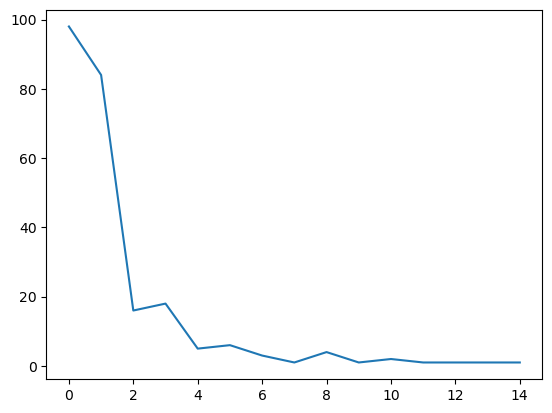

In [27]:
import matplotlib.pyplot as plt
plt.plot(test_corpus.get_span_distro(conditional_rep = test_dir, return_format = 'list', level = 'token'))
plt.show()

The function get_span_count(self, article, item, value) returns the number of spans in the span_list. This can be used to retrieve the amount of spans matching a certain condition, e.g. all those annotated with tags in the layer 'Policydesigncharacteristics' in the policy 'EU_32008R1099':


In [28]:
test_corpus.get_span_count(item = 'layer', value = 'Policydesigncharacteristics', conditional_rep = test_dir)

199

The function most_frequent_labeled_spans(self, conditional_rep, item, value) returns a dict of all the most frequent spans of a span_list:

In [29]:
test_corpus.most_frequent_labeled_spans(item = 'layer', value = 'Policydesigncharacteristics', conditional_rep = test_dir)

{'national statistics': 14,
 'commission': 13,
 'member states': 11,
 'statistics': 11,
 'eurostat': 10,
 'energy statistics': 10,
 'commission (eurostat)': 8,
 'annual': 6,
 'final energy consumption statistics': 6,
 'data': 6,
 'nuclear statistics': 5,
 'renewable energy statistics': 5,
 'community': 5,
 'decision 1999/468/ec': 3,
 'regulation (ec) no\xa0322/97': 3,
 'reported': 2,
 'cost-benefit analyses': 2,
 'reporting': 2,
 'users': 2,
 'information': 2,
 'report': 2,
 'monthly': 2,
 'short-term monthly': 2,
 'community statistics': 2,
 '20th day following its publication in the official journal': 1,
 '20th day following its publication': 1,
 'nuclear energy sector': 1,
 'from 2009 onwards': 1,
 '2009': 1,
 'reported period': 1,
 'improving the quality of renewable energy and final energy consumption statistics': 1,
 'annually': 1,
 'existing studies': 1,
 'feasibility pilot studies': 1,
 'evaluating': 1,
 'pilot studies': 1,
 'quality assessment': 1,
 'reports': 1,
 'commission 

The function get_tokens_from_span_list(self, conditional_rep, item, value) returns a list of all the tokens in a span list:

In [30]:
test_corpus.get_tokens_from_span_list(item = 'layer', value = 'Policydesigncharacteristics', conditional_rep = test_dir)

[token id: T201963, start:754 stop:761 text:markets tag_count:2,
 token id: T156068, start:2029 stop:2039 text:commission tag_count:2,
 token id: T98654, start:68 stop:78 text:statistics tag_count:1,
 token id: T164210, start:206 stop:208 text:ec tag_count:1,
 token id: T162884, start:110 stop:118 text:national tag_count:2,
 token id: T262694, start:217 stop:219 text:no tag_count:1,
 token id: T155994, start:1658 stop:1663 text:every tag_count:1,
 token id: T163024, start:861 stop:867 text:energy tag_count:2,
 token id: T155724, start:295 stop:299 text:2005 tag_count:2,
 token id: T98649, start:28 stop:38 text:statistics tag_count:1,
 token id: T142464, start:607 stop:613 text:annual tag_count:1,
 token id: T262762, start:493 stop:494 text:  tag_count:1,
 token id: T156035, start:1869 stop:1871 text:of tag_count:1,
 token id: T201931, start:558 stop:567 text:transport tag_count:1,
 token id: T163202, start:123 stop:133 text:evaluation tag_count:1,
 token id: T156003, start:1708 stop:17

### Counting tokens and their annotations in span list

The function get_token_count_from_span_list returns the amount of tokens in the span_list:

In [31]:
test_corpus.get_token_count_from_span_list(item = 'layer', value = 'Policydesigncharacteristics', conditional_rep = test_dir)

382

The function most_frequent_labeled_tokens(self, conditional_rep, item, value) returns a dict of all the most frequent tokens of a span_list:

In [32]:
test_corpus.most_frequent_labeled_tokens(item = 'layer', value = 'Policydesigncharacteristics', conditional_rep = test_dir)

{'statistics': 56,
 'energy': 29,
 'commission': 23,
 'eurostat': 19,
 '/': 15,
 'the': 14,
 'national': 14,
 'and': 13,
 'member': 12,
 'of': 12,
 '(': 12,
 ')': 12,
 'states': 11,
 'community': 10,
 'ec': 9,
 'data': 8,
 'final': 7,
 'consumption': 7,
 'annual': 6,
 'nuclear': 6,
 'renewable': 6,
 'decision': 6,
 'following': 4,
 'reported': 4,
 'no': 4,
 '\xa0': 4,
 ',': 4,
 'statistical': 4,
 'regulation': 4,
 'monthly': 4,
 'studies': 3,
 'for': 3,
 'monitoring': 3,
 'gas': 3,
 'months': 3,
 'year': 3,
 '1999': 3,
 '468': 3,
 'producers': 3,
 'traders': 3,
 'distributors': 3,
 'transporters': 3,
 'importers': 3,
 'exporters': 3,
 '322': 3,
 '97': 3,
 '20th': 2,
 'day': 2,
 'its': 2,
 'publication': 2,
 'in': 2,
 'from': 2,
 '2009': 2,
 'period': 2,
 'quality': 2,
 'pilot': 2,
 'cost-benefit': 2,
 'analyses': 2,
 'reporting': 2,
 '2005': 2,
 '166': 2,
 'mechanism': 2,
 'kyoto': 2,
 'protocol': 2,
 'users': 2,
 'information': 2,
 'date': 2,
 'report': 2,
 'within': 2,
 'six': 2,
 't

The function get_tokens_with_label_count(self, conditional_rep, label_count) return all the tokens based on a conditional rep that have a specific label_count:

In [33]:
test_corpus.get_tokens_with_label_count(conditional_rep = test_dir, label_count= 3)

[token id: T155758, start:449 stop:458 text:mechanism tag_count:3,
 token id: T155760, start:463 stop:473 text:monitoring tag_count:3,
 token id: T156042, start:1902 stop:1912 text:commission tag_count:3,
 token id: T156044, start:1914 stop:1922 text:eurostat tag_count:3,
 token id: T163207, start:166 stop:172 text:energy tag_count:3,
 token id: T163208, start:173 stop:183 text:statistics tag_count:3,
 token id: T163211, start:191 stop:200 text:community tag_count:3,
 token id: T201898, start:354 stop:363 text:producers tag_count:3,
 token id: T201900, start:368 stop:375 text:traders tag_count:3,
 token id: T201902, start:377 stop:389 text:distributors tag_count:3,
 token id: T201904, start:394 stop:406 text:transporters tag_count:3,
 token id: T201906, start:408 stop:417 text:importers tag_count:3,
 token id: T201908, start:422 stop:431 text:exporters tag_count:3]

The function get_label_count_per_token_distro(self, conditional_rep, return_format) returns a distribution of the tag_count for all the tokens in a conditional repository. This can be used to evaluate how many tokens have been labeled once, twice and so on. The distribution is returned in either list or dict:

In [34]:
test_corpus.get_label_count_per_token_distro(conditional_rep = test_dir, return_format = 'dict')

{0: 1586, 1: 329, 2: 111, 3: 13, 4: 2}

In [35]:
test_corpus.get_label_count_per_token_distro(conditional_rep = test_dir, return_format = 'list')

[1586, 329, 111, 13, 2]

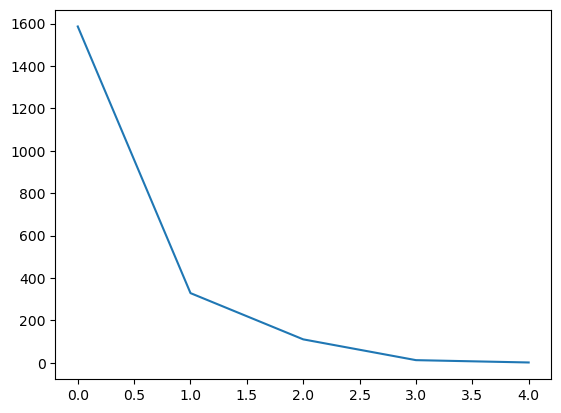

In [36]:
plt.plot(test_corpus.get_label_count_per_token_distro(conditional_rep = test_dir, return_format = 'list'))
plt.show()